In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import optimizers
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
y_train_, y_test_ = y_train, y_test

In [4]:
(_, _), (X_test_, y_test_) = cifar10.load_data()

In [5]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

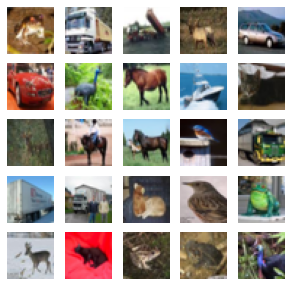

In [6]:
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')

In [7]:
y_train.shape

(50000, 1)

In [8]:
labels =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 
         'horse', 'ship','truck']

Use one hot encoding to represent lables as cathegorical list

In [9]:
y_train = np_utils.to_categorical(y_train.T)[0]
y_test = np_utils.to_categorical(y_test.T)[0]

In [10]:
y_train.shape

(50000, 10)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

Normalize our input

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [14]:
X_test.shape

(10000, 32, 32, 3)

Create model

In [15]:
K.clear_session()

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(input_shape = (32, 32, 3), padding = 'same', filters = 32, kernel_size = (3,3), 
                    activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(rate = 0.5)) #prevents overfitting, applied only in training
model.add(Dense(10, activation = 'softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 4,200,842
Trainable params: 4,200,842
Non-trainable params: 0
______________________________________________

In [22]:
model.compile(optimizer = 'ADAM', loss = keras.losses.categorical_crossentropy, 
              metrics = ['accuracy'])             

In [23]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpsabz6sov.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpsabz6sov.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1563/1563 [==============================] - 138s 69ms/step - loss: 1.6960 - accuracy: 0.3892 - val_loss: 1.2136 - val_accuracy: 0.5658
Epoch 2/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.2042 - accuracy: 0.5755 - val_loss: 1.0980 - val_accuracy: 0.6112
Epoch 3/10
1563/1563 [==============================] - 88s 56ms/step - loss: 1.0637 - accuracy: 0.620

In [24]:
def plot_loss_curves(history):
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))

  #Plot Loss
  plt.plot(epochs, train_loss, label = 'Training Loss')
  plt.plot(epochs, val_loss, label = 'Validation Loss')
  plt.title('Loss')
  plt.xlabel('epochs')
  plt.legend()

  #Plot Accuracy
  plt.figure()
  plt.plot(epochs, train_accuracy, label = 'Training Accuracy')
  plt.plot(epochs, val_accuracy, label = 'Validation Accuracy')
  plt.title('Accuracy')
  plt.xlabel('epochs')
  plt.legend()

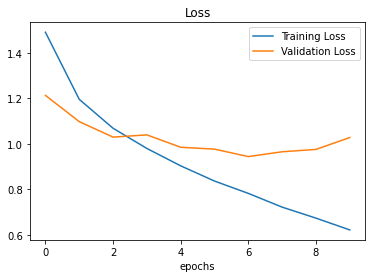

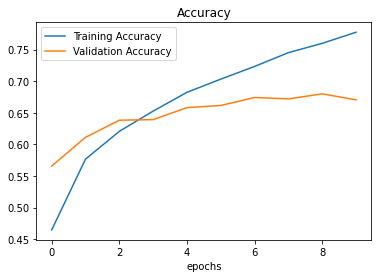

In [25]:
plot_loss_curves(history)

I will try to improve my model adding more Conv2D layers and removing Dense layers (same architecture as here https://poloclub.github.io/cnn-explainer/)

In [33]:
K.clear_session()

In [34]:
model_ = Sequential()

In [35]:
model_.add(Conv2D(input_shape = (32, 32, 3), 
                  strides=(1,1), 
                  padding = 'same', 
                  filters = 10, 
                  kernel_size = (3,3), 
                  activation = 'relu'))
model_.add(Conv2D(strides=(1,1), 
                  padding = 'same', 
                  filters = 10, 
                  kernel_size = (3,3), 
                  activation = 'relu'))
model_.add(MaxPooling2D(pool_size = (2,2), padding = 'same', strides=(2,2)))
model_.add(Conv2D(strides=(1,1), 
                  padding = 'same', 
                  filters = 10, 
                  kernel_size = (3,3), 
                  activation = 'relu'))
model_.add(Conv2D(strides=(1,1), 
                  padding = 'same', 
                  filters = 10, 
                  kernel_size = (3,3), 
                  activation = 'relu'))
model_.add(MaxPooling2D(pool_size = (2,2), padding = 'same', strides=(2,2)))
model_.add(Flatten())
model_.add(Dense(units = 512, activation = 'relu'))
model_.add(Dropout(rate = 0.5)) #prevents overfitting, applied only in training
model_.add(Dense(10, activation = 'softmax'))

In [36]:
model_.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 10)        280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 10)        910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 10)        910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 10)        910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 640)               0

In [37]:
model_.compile(optimizer = 'ADAM', loss = keras.losses.categorical_crossentropy, 
              metrics = ['accuracy'])             

In [38]:
history_ = model_.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 88s 55ms/step - loss: 1.7532 - accuracy: 0.3543 - val_loss: 1.2712 - val_accuracy: 0.5424
Epoch 2/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.2910 - accuracy: 0.5337 - val_loss: 1.1387 - val_accuracy: 0.5953
Epoch 3/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.1390 - accuracy: 0.5922 - val_loss: 1.0864 - val_accuracy: 0.6080
Epoch 4/10
1563/1563 [==============================] - 82s 53ms/step - loss: 1.0521 - accuracy: 0.6276 - val_loss: 1.0065 - val_accuracy: 0.6451
Epoch 5/10
1563/1563 [==============================] - 98s 63ms/step - loss: 0.9843 - accuracy: 0.6503 - val_loss: 1.0578 - val_accuracy: 0.6297
Epoch 6/10
1563/1563 [==============================] - 93s 59ms/step - loss: 0.9212 - accuracy: 0.6716 - val_loss: 0.9878 - val_accuracy: 0.6510
Epoch 7/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8722 - accuracy: 0.6927 - val_loss: 0.9172 -

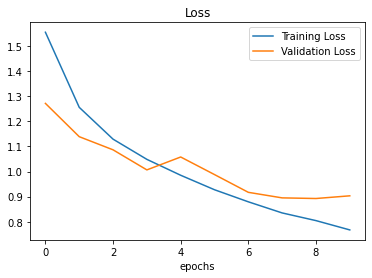

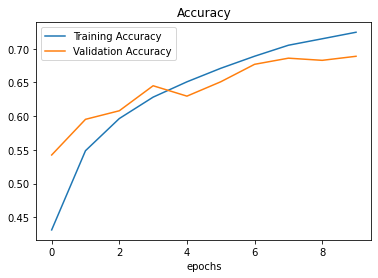

In [39]:
plot_loss_curves(history_)

In [40]:
results = model_.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9033 - accuracy: 0.6888


In [41]:
print('Test loss:', results[0])
print('Test accuracy:', results[1])

Test loss: 0.9033091068267822
Test accuracy: 0.6887999773025513


In [42]:
model_.save("CIFAR10_3.h5")

In [55]:
def plot_results(model):
    plt.figure(figsize=(5,7))
    for i in range(25):
        pred = model.predict(np.asarray([X_test[i]]))
        max_ind = np.argmax(pred)
        title = labels[max_ind]
        plt.subplot(5, 5, i+1)
        plt.imshow(X_test_[i])
        plt.title(title)
        plt.axis('off')
        plt.savefig(f'output{model}.png')


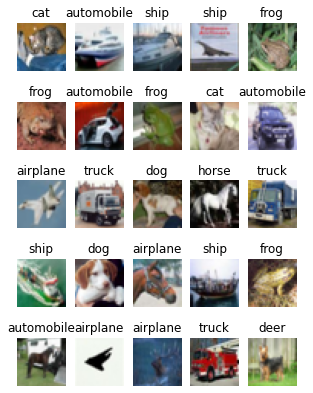

In [56]:
plot_results(model_)

In [57]:
K.clear_session()

In [58]:
model_2 = keras.Sequential()
model_2.add(Conv2D(input_shape = (32, 32, 3), 
                  strides=(1,1), 
                  filters = 10, 
                  kernel_size = (3,3), 
                  activation = 'relu'))
model_2.add(Conv2D(strides=(1,1), 
                  filters = 10, 
                  kernel_size = (3,3), 
                  activation = 'relu'))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(strides=(1,1), 
                  filters = 10, 
                  kernel_size = (3,3), 
                  activation = 'relu'))
model_2.add(Conv2D(strides=(1,1), 
                  filters = 10, 
                  kernel_size = (3,3), 
                  activation = 'relu'))
model_2.add(MaxPooling2D())
model_2.add(Flatten())
model_2.add(Dense(units = 512, activation = 'relu'))
model_2.add(Dropout(rate = 0.5)) #prevents overfitting, applied only in training
model_2.add(Dense(10, activation = 'softmax'))

In [59]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 10)        280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 10)        910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 10)        910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 10)        910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 250)               0

In [60]:
model_2.compile(optimizer = 'ADAM', loss = keras.losses.categorical_crossentropy, 
              metrics = ['accuracy'])         

In [61]:
history_2 = model_2.fit(X_train, y_train, batch_size = 32, epochs = 20, validation_data = (X_test, y_test),
                      validation_batch_size=32)

Epoch 1/20
1563/1563 [==============================] - 58s 36ms/step - loss: 1.8484 - accuracy: 0.3101 - val_loss: 1.3886 - val_accuracy: 0.4852
Epoch 2/20
1563/1563 [==============================] - 54s 34ms/step - loss: 1.4120 - accuracy: 0.4884 - val_loss: 1.3725 - val_accuracy: 0.5034
Epoch 3/20
1563/1563 [==============================] - 55s 35ms/step - loss: 1.2974 - accuracy: 0.5361 - val_loss: 1.2487 - val_accuracy: 0.5482
Epoch 4/20
1563/1563 [==============================] - 56s 36ms/step - loss: 1.2280 - accuracy: 0.5642 - val_loss: 1.1815 - val_accuracy: 0.5843
Epoch 5/20
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1590 - accuracy: 0.5884 - val_loss: 1.1487 - val_accuracy: 0.5875
Epoch 6/20
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1075 - accuracy: 0.6067 - val_loss: 1.0919 - val_accuracy: 0.6138
Epoch 7/20
1563/1563 [==============================] - 56s 36ms/step - loss: 1.0772 - accuracy: 0.6200 - val_loss: 1.0723 -

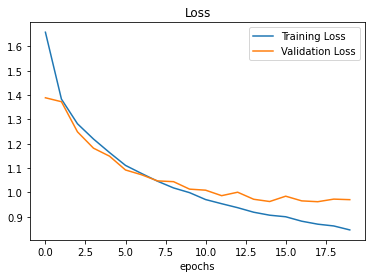

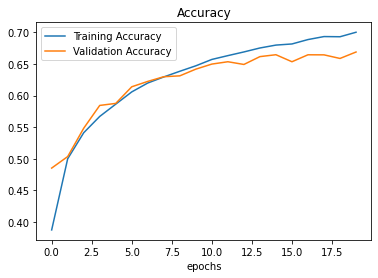

In [62]:
plot_loss_curves(history_2)

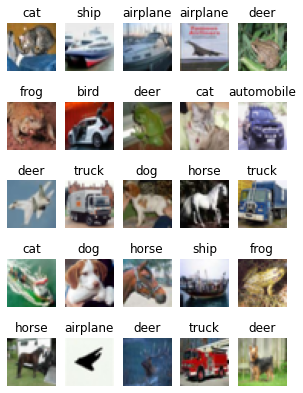

In [63]:
plot_results(model_2)